# 📋Table of Contents
* [INtroduction](#1)
* [📚 Import Libraries](#2)
* [📖 Read Dataset](#3)
* [😅😅Missing & Duplicate Values](#4) 
    - [Dropping column](#4.1)
    - [Merging two datasets](#4.2)
    - [Missing Values](#4.3)
    - [Duplicates](#4.4)
* [EDA](#5)
    - [Correlation](#5.1)
    - [Useful Feature](#5.2)
* [🖇🖇📭Data Pipeline](#7)
    - [Creating X and y](#7.1)
    - [Okay I need to explain](#7.2)
    - [Main Pipeline](#7.3)
* [⚙️Finding and Training Models With Best Hyperparameters](#8)
    - [Random Jungle](#8.1)
    - [My Cat](#8.2)
    - [LGBM LIGHT](#8.3)
    - [Extreme Guy](#8.4)
* [👀👁FInal MOdel WIth VOting](#9)
* [📊Generate Predictions and Create Submission File](#10)

# <center><a id = 1>INtroduction
Hi , you clicked this notebook, so without any wasting time, let's get started..., Assuming (may be true or not) you're a beginner who needs a nice notebook to experiment with this  by forking it (so don't forget to upvote this)...
   
But some context.....
![https://miro.medium.com/v2/resize:fit:1400/1*WqId29D5dN_8DhiYQcHa2w.png](https://miro.medium.com/v2/resize:fit:1400/1*WqId29D5dN_8DhiYQcHa2w.png)    

# Why do customers churn?
Here are four common reasons customers can churn:

1. Price: by far, one of the most common reasons customers churn is price. Asking customers to pay top dollar for a product – especially if they aren’t experiencing the value to make it worth it – can be a stretch and quickly wear thin with decision-makers.

2. Product: many times, customers purchase a product based on what it can do (or may be able to do in the future) to make their lives easier. If this product isn’t living up to expectations, or if promised features aren’t being delivered, the customer will churn.

3. Competition: if you’re a SaaS organization, there will always be someone out there delivering the same thing to customers like you. If the competition becomes too appealing, there is often little you can do to pull a customer back in.

4. State of business: sometimes, factors at play internally make it impossible for a customer to continue their vendor relationships. However, this reason cuts just as deep as some of the others.

**The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:**

1. Customer ID: A unique identifier for each customer
2. Surname: The customer's surname or last name
3. Credit Score: A numerical value representing the customer's credit score
4. Geography: The country where the customer resides (France, Spain or Germany)
5. Gender: The customer's gender (Male or Female)
6. Age: The customer's age.
7. Tenure: The number of years the customer has been with the bank
8. Balance: The customer's account balance
9. NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
10. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
11. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
12. EstimatedSalary: The estimated salary of the customer
13. Exited: Whether the customer has churned (1 = yes, 0 = no)

# <center> <a id = 2>📚Import Libraries

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# <center> <a id = 3>📖Read Dataset

In [25]:
samp = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
main = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

# <center> <a id = 4>😅😅Missing & Duplicate Values 

# <a id =4.1> Dropping column

In [26]:
# They are just indexes so, dropping them right now 
main.drop('RowNumber', inplace = True, axis = 1)
train.drop('id', inplace = True, axis = 1)
test.drop('id', inplace = True, axis = 1)

# <a id = 4.2> Merging two datasets

In [27]:
print(main.shape, train.shape)
train = pd.concat([train, main], axis = 0)

(10002, 13) (165034, 13)


# <a id = 4.4> Missing Values

In [28]:
print(train.isnull().sum())
test.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

* hmm.... Some problem will be solved at data pipeline

# <a id = 4.3> Duplicates

In [29]:
# Remove duplicated rows
print(train.duplicated().sum())
train = train.drop_duplicates()
train.shape

2


(175034, 13)

# <center> <a id = 5>EDA

In [30]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,175034.0,1.569194e+07,71428.904538,15565701.00,15632882.00,15690169.00,1.575666e+07,15815690.00
CreditScore,175034.0,6.561158e+02,81.151171,350.00,597.00,659.00,7.100000e+02,850.00
Age,175033.0,3.817143e+01,8.969537,18.00,32.00,37.00,4.200000e+01,92.00
Tenure,175034.0,5.019922e+00,2.811136,0.00,3.00,5.00,7.000000e+00,10.00
Balance,175034.0,5.667830e+04,62982.565768,0.00,0.00,0.00,1.207293e+05,250898.09
NumOfProducts,175034.0,1.553070e+00,0.549210,1.00,1.00,2.00,2.000000e+00,4.00
HasCrCard,175033.0,7.511841e-01,0.432328,0.00,1.00,1.00,1.000000e+00,1.00
IsActiveMember,175033.0,4.987574e-01,0.500000,0.00,0.00,0.00,1.000000e+00,1.00
EstimatedSalary,175034.0,1.118616e+05,50815.382991,11.58,73192.37,116969.73,1.547673e+05,199992.48
Exited,175034.0,2.111475e-01,0.408124,0.00,0.00,0.00,0.000000e+00,1.00


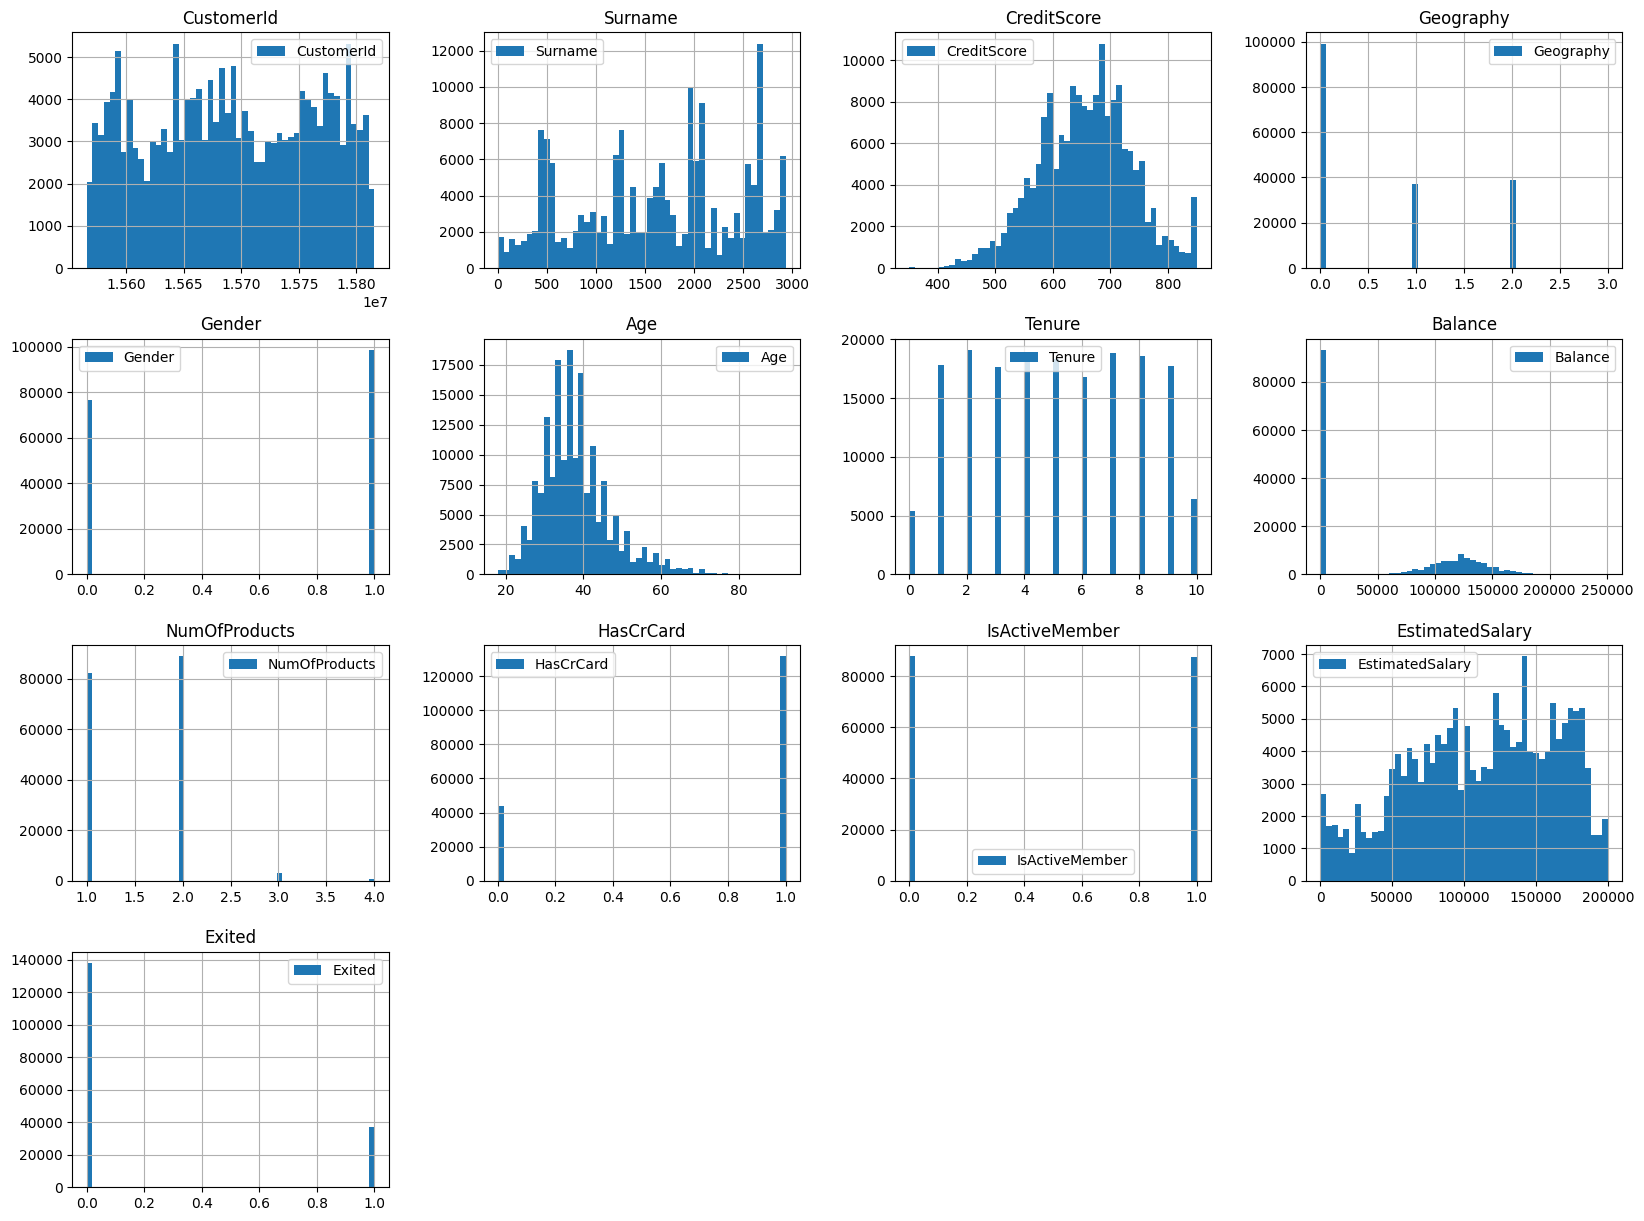

In [31]:
# Plotting every feature on the graph 

from sklearn.preprocessing import LabelEncoder
# Create a deep copy of train and name it data
data = train.copy()

label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Surname'] = label_encoder.fit_transform(data['Surname'])

data.hist(bins=50, figsize=(20,15), legend = True)
plt.show()

In [32]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,2023,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,2024,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,1236,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,1362,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,491,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,0,1,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,15569892,1336,516,0,1,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,15584532,1570,709,0,0,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,15682355,2345,772,1,1,42.0,3,75075.31,2,1.0,0.0,92888.52,1


WE need to utilize the categorical columns also ... we are LabelEncoding this and many people have broken bank account , they literally have zero money

In [33]:
data.nunique() #Uniqueness of the feature

CustomerId         23421
Surname             2932
CreditScore          460
Geography              4
Gender                 2
Age                   73
Tenure                11
Balance            30239
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary    55581
Exited                 2
dtype: int64

# <a id = 5.1>Correlation 

I am only checking the coorelation here only

In [34]:
# Measuring correlation function
def corr(data):
    # Set up the matplotlib figure
    plt.figure(figsize=(22, 10))
    # Create a heatmap using Seaborn
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    # Set the title of the plot
    plt.title('Correlation Matrix of Features')
    

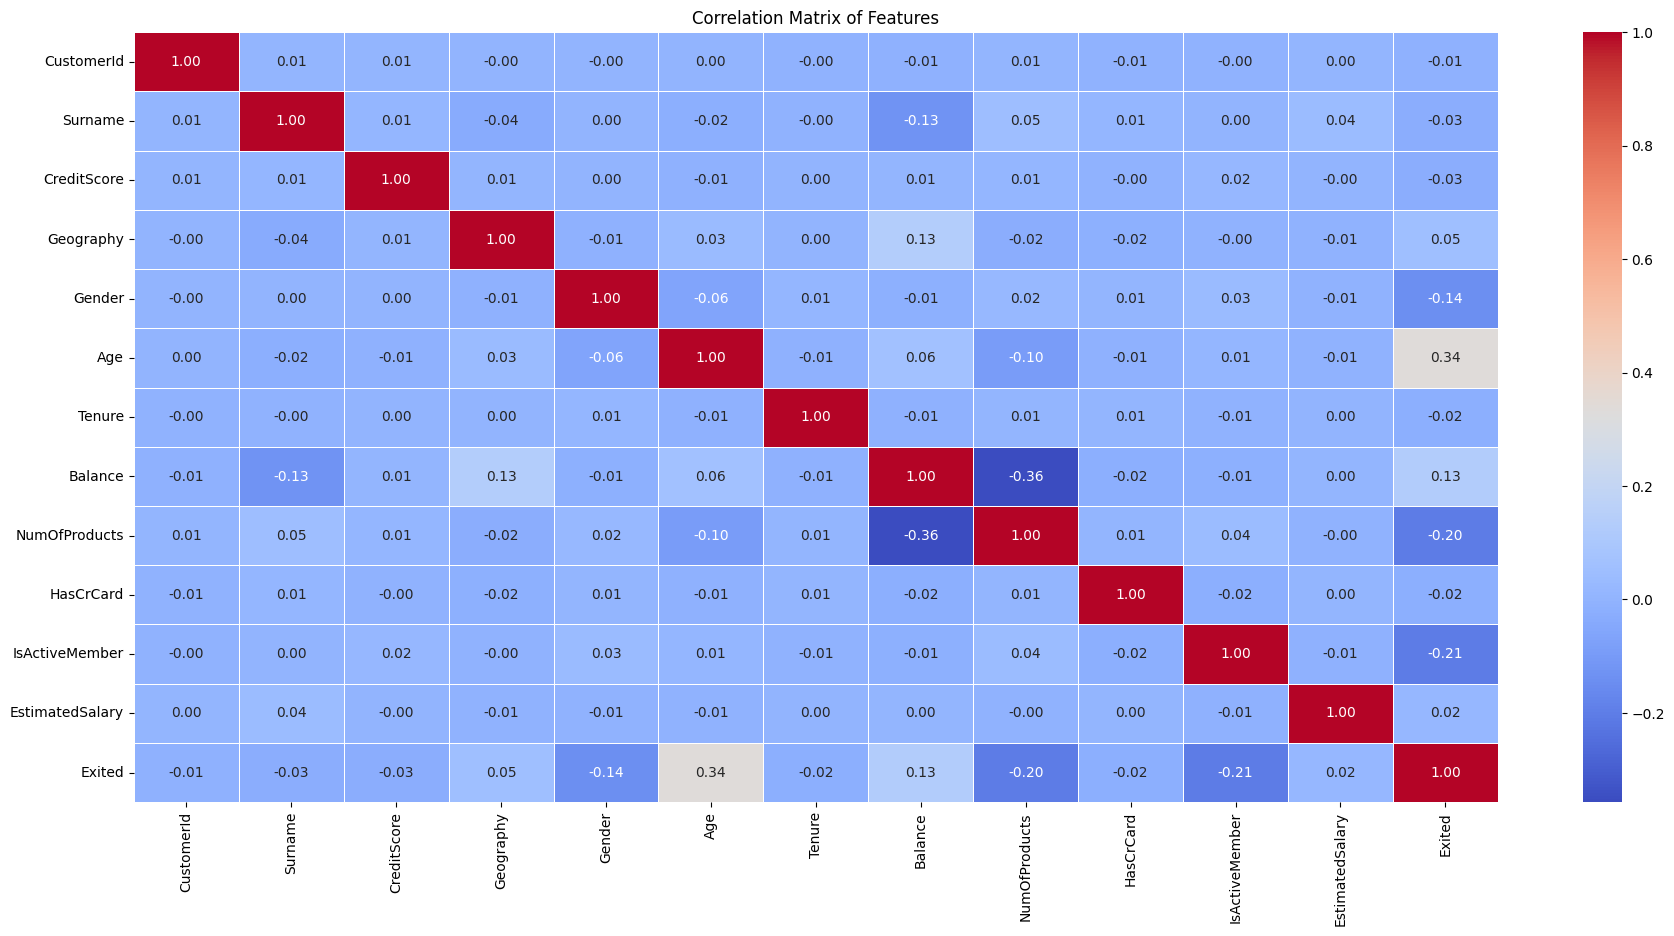

In [35]:
# Calculate the correlation matrix
corr(data.corr())

**Feature Eng...**

In [36]:
def geo_gender_tr(df) : 
    df['Geo_Gender'] = df['Geography'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def cred_score_tr(df) : 
    df['Credit_Score_Range'] = pd.cut(df['CreditScore'], bins=[0, 300, 600, 700, 800, 900], labels=['0-300', '300-600', '600-700', '700-800', '900+'])
    return df

def age_tr(df) : 
    df['Age_Category'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '30-40', '40-50', '50-60', '60+'],include_lowest = True)
    return df


def is_young(df):
    df['IS_Young'] = pd.cut(df['Age'], bins = [18, 35, 100], labels = [0, 1 ], include_lowest = True)
    return df

def gen_active_tr(df) : 
    df['IsActive_Gender'] = df['IsActiveMember'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def gen_no_tr(df) : 
    df['No_Gender'] = df['NumOfProducts'].astype('str') + '_' + df['Gender'].astype('str')
    return df

def acc_sal_tr(df):
    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    return df

def age_sal_tr(df):
    df['Balance_Age_Ratio'] = df['Balance'] / df['Age']
    return df

def age_acc_tr(df):
    df['Salary_Age_ratio'] = df['EstimatedSalary'] / df['Age']
    return df

def tp_gender_tr(df) : 
    df['Tp_Gender'] = df['NumOfProducts'].astype('str') + df['Gender'].astype('str')
    return df

def meme(data):
    data['Mem__no__Products'] = data['NumOfProducts'] * data['IsActiveMember']
    return data

def credit_tenure(data):
    data['Credit_per_tenure'] = data['Tenure'] / data['CreditScore']
    return data

def salary_tenure(data):
    data['Credit_per_tenure'] = data['Tenure'] / data['EstimatedSalary']
    return data

In [37]:
data = geo_gender_tr(data)
data = cred_score_tr(data)
data = age_tr(data)
data = is_young(data)
data = gen_active_tr(data)
data = gen_no_tr(data)
data = acc_sal_tr(data)
data = age_sal_tr(data)
data = age_acc_tr(data)
data = tp_gender_tr(data)
data = meme(data)
data = credit_tenure(data)
data = salary_tenure(data)

data['Geo_Gender'] = label_encoder.fit_transform(data['Geo_Gender'])
data['Credit_Score_Range'] = label_encoder.fit_transform(data['Credit_Score_Range'])
data['Age_Category'] = label_encoder.fit_transform(data['Age_Category'])
data['IsActive_Gender'] = label_encoder.fit_transform(data['IsActive_Gender'])
data['No_Gender'] = label_encoder.fit_transform(data['No_Gender'])
data['Tp_Gender'] = label_encoder.fit_transform(data['Tp_Gender'])

# <a id = 5.2> Useful Feature

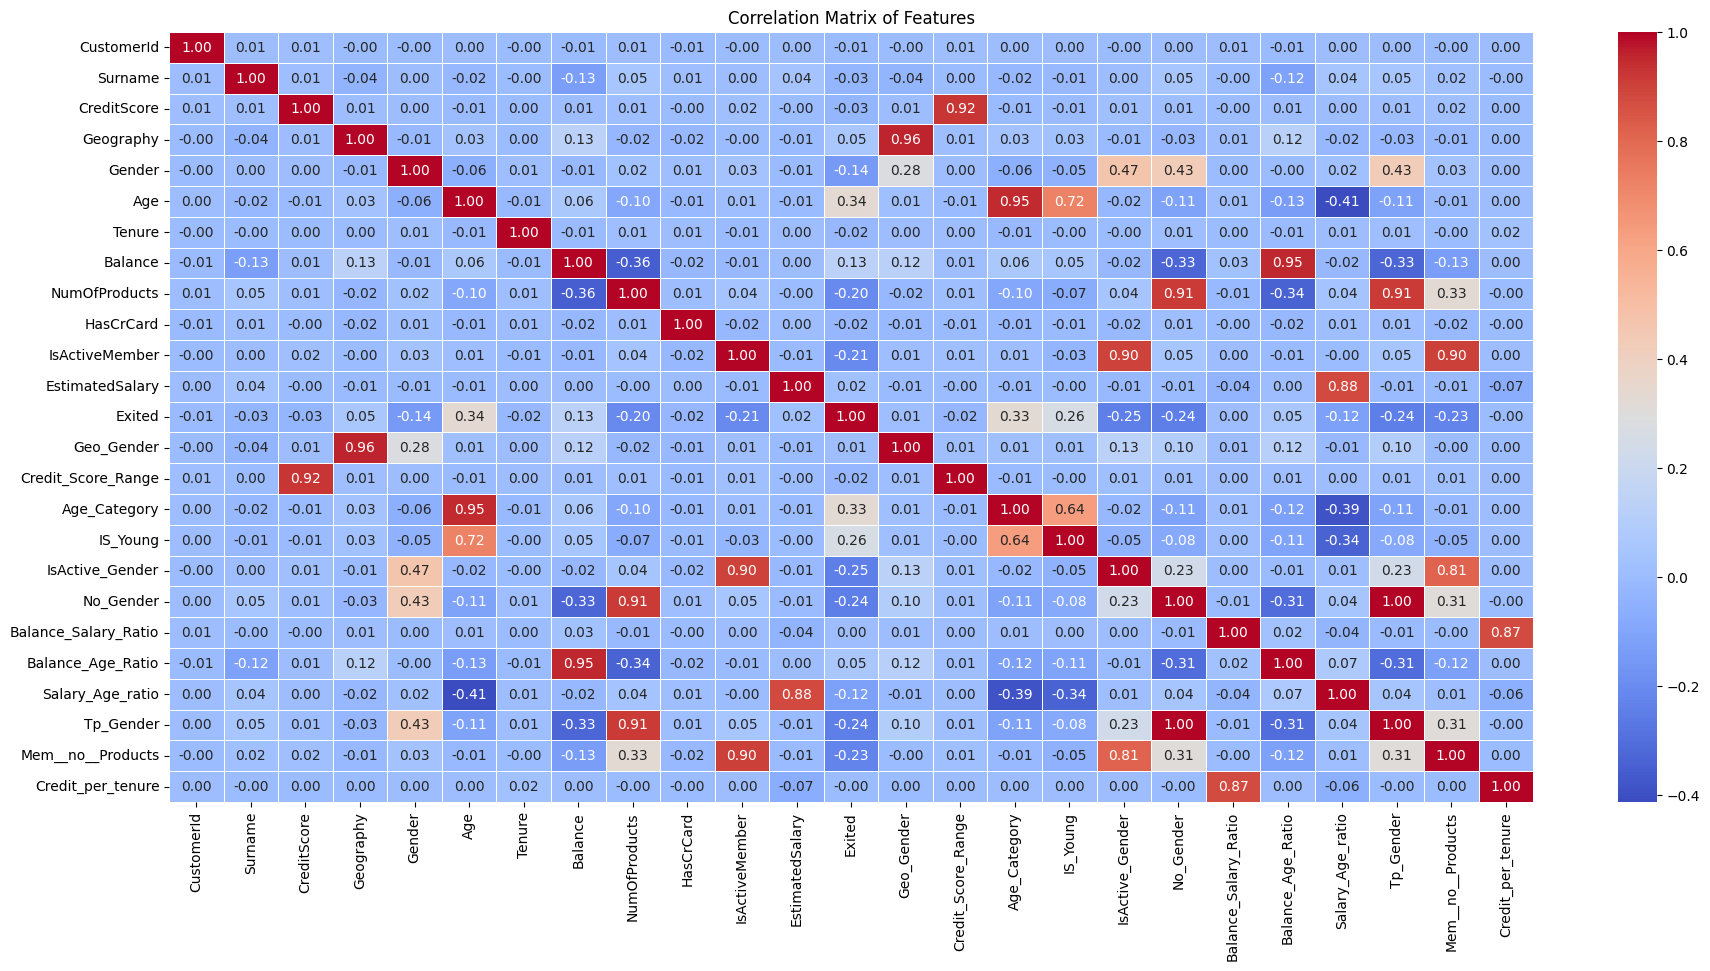

In [38]:
corr(data.corr())

# <center> <a id = 7>🖇🖇📭Data Pipeline

# <a id = 7.1> Creating X and y 

In [39]:
label_encoder = LabelEncoder()

train['Surname'] = label_encoder.fit_transform(train['Surname'])
test['Surname'] = label_encoder.transform(test['Surname'])

# New Feature 
train = age_tr(train)
train = is_young(train)
train = gen_active_tr(train)
train = age_sal_tr(train)
train = age_acc_tr(train)
train = tp_gender_tr(train)
train = meme(train)

test = age_tr(test)
test = is_young(test)
test = gen_active_tr(test)
test = age_sal_tr(test)
test = age_acc_tr(test)
test = tp_gender_tr(test)
test = meme(test)

In [40]:
X = train.drop('Exited', axis=1)
y = train['Exited']

# getting list of the numerical and categorical columns
num = X.select_dtypes(include=['int64', 'float64']).columns
col = X.select_dtypes(include=['object']).columns

In [41]:
col

Index(['Geography', 'Gender', 'IsActive_Gender', 'Tp_Gender'], dtype='object')

# <a id = 7.2> Okay I need to explain
If you don't understand why I dropped first 'Surname' and after some processing added again, lemme explain:

1. You can't use the Surname in the OnehotEncoder '2932' unique names , it will create '2932' features , and we will we facing the [Curse of dimensionality](https://towardsdatascience.com/curse-of-dimensionality-a-curse-to-machine-learning-c122ee33bfeb)..
2. To avoid this we are using LabelEncoder , well what is the difference between [ONehot vs Label Encoder](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)??
3. SO , we dropped 'Surname' in the dataset and then applied LabelEncoder to convert catt.. to numm. columns type , and added back 
4. Why we are doing this ??? Well, OnehotEncoder outperforms the LabelEncoder in creating useful features (so we will be using it in the main Pipeline), but when features are too much LabelEncoder is better choice , OnehoteEncoder is good to go when you have 10-20 unique values... but we have '2932'

# <a id = 7.3>Main Pipeline

In [42]:
# Preprocessing for numerical data: imputation and scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, col)])

#preprocessor is the final pipeline, we will using it before the data feds into the ml algo.... using Pipeline

In [43]:
col

Index(['Geography', 'Gender', 'IsActive_Gender', 'Tp_Gender'], dtype='object')

In [44]:
train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,IS_Young,IsActive_Gender,Balance_Age_Ratio,Salary_Age_ratio,Tp_Gender,Mem__no__Products
0,15674932,2023,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,30-40,0,0.0_Male,0.000000,5498.483939,2Male,0.0
1,15749177,2024,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,30-40,0,1.0_Male,0.000000,1500.106061,2Male,2.0
2,15694510,1236,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,30-40,1,0.0_Male,0.000000,4621.667250,2Male,0.0
3,15741417,1362,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,30-40,0,1.0_Male,4378.898235,2487.084706,1Male,1.0
4,15766172,491,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,30-40,0,1.0_Male,0.000000,456.631212,2Male,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1999,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0,30-40,1,0.0_Male,0.000000,2468.477949,2Male,0.0
9996,15569892,1336,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0,30-40,0,1.0_Male,1639.131714,2905.707714,1Male,1.0
9997,15584532,1570,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1,30-40,1,1.0_Female,0.000000,1169.043889,1Female,1.0
9998,15682355,2345,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1,40-50,1,0.0_Male,1787.507381,2211.631429,2Male,0.0


In [45]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <center> <a id = 8>⚙️Finding and Training Models With Best Hyperparameters

# What is OPtuna??
Hmmmm.. background we need models fine tuned (meaning with best Hyperparameters) , so we are using Optuna

[OPtuna](https://towardsdatascience.com/state-of-the-art-machine-learning-hyperparameter-optimization-with-optuna-a315d8564de1) is a software framework that automatically optimizes hyperparameters. It's designed for machine learning and can be used with other frameworks like TensorFlow, PyTorch, Keras, and SKlearn. 
Using OPtuna is going to help us to find best hyperparameters

# <a id = 8.1> Random Jungle

[Random forests](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/) or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned ..

In [46]:
# # Don't uncomment to run it this will take more time than you can think and Kaggle allows , above 12 hours

# def objective(trial):
#     # Define the hyperparameters to be optimized
#     n_estimators = trial.suggest_int('n_estimators', 10, 1000, step=5)
#     max_depth = trial.suggest_int('max_depth', 5, 100)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 50)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 50)
#     max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
#     bootstrap = trial.suggest_categorical('bootstrap', [True, False])
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
#     # Create a Random Forest model with the specified hyperparameters
#     model = RandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         bootstrap=bootstrap,
#         criterion=criterion,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
#     # Train the model
#     pipeline.fit(X_train, y_train)
    
#     # Make predictions on the test set
#     predictions = pipeline.predict_proba(X_test)[:, 1]
    
#     # Calculate AUC-ROC as the metric to optimize
#     auc_roc = roc_auc_score(y_test, predictions)
    
#     return auc_roc

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# # Get the best hyperparameters
# best_params = study.best_params
# print("Best Hyperparameters:", best_params)


In [47]:
# # Train the final model with the best hyperparameters on the entire dataset
# best_model = RandomForestClassifier(**{'n_estimators': 425, 'max_depth': 13, 'min_samples_split': 41, 'min_samples_leaf': 2, 
#                                       'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'entropy', 'random_state': 42})

# Ran_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
# Ran_best.fit(X_train, y_train)

# predictions = Ran_best.predict_proba(X_test)[:, 1]

# auc_roc = roc_auc_score(y_test, predictions)
    
# auc_roc

#previous 0.8863970621948215
# after 0.851376404143134

# <a id= 8.2> My Cat

[CatBoost](https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/) is an open-source machine learning library developed by Yandex. It's an algorithm for gradient boosting on decision trees that uses decision trees for classification and regression

In [48]:
# Don't uncomment to run it this will take more time than you can think and Kaggle allows , above 12 hours

# from catboost import CatBoostClassifier

# def objective(trial):
#     iterations = trial.suggest_int('iterations', 50, 1000, step=10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.5)
#     depth = trial.suggest_int('depth', 3, 15)
#     l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-3, 1)

#     model = CatBoostClassifier(
#         iterations=iterations,
#         learning_rate=learning_rate,
#         depth=depth,
#         l2_leaf_reg=l2_leaf_reg,
#         random_state=42,
#         verbose=0  # Set verbose to 0 to suppress CatBoost output
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     probabilities = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
#     auc_roc = roc_auc_score(y_test, probabilities)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (CatBoost):", best_params)

In [49]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = CatBoostClassifier(**{'iterations': 830, 'learning_rate': 0.08238714339235984, 'depth': 5,
                                 'l2_leaf_reg': 0.8106903985997884, 'random_state': 42, 'verbose': 0})

Cat_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

Cat_best.fit(X_train, y_train)

predictions = Cat_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc
#previous 0.8893488306520324
# after  0.891890282220051

0.8911672933183443

# <a id = 8.3 > LGBM LIGHT

[LightGBM](https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc), short for light gradient-boosting machine, is a free and open-source distributed gradient-boosting framework for machine learning, originally developed by Microsoft.

In [50]:
# Don't uncomment to run it this will take more time than you can think and Kaggle allows , above 12 hours

# from lightgbm import LGBMClassifier

# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_child_samples = trial.suggest_int('min_child_samples', 1, 20)
#     subsample = trial.suggest_float('subsample', 0.5, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

#     model = LGBMClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_child_samples=min_child_samples,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     probabilities = pipeline.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
#     auc_roc = roc_auc_score(y_test, probabilities)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (LightGBM):", best_params)

In [51]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = LGBMClassifier(**{'n_estimators': 960, 'learning_rate': 0.031725771326186744, 'max_depth': 8, 'min_child_samples': 8, 
                               'subsample': 0.7458307885861184, 'colsample_bytree': 0.5111460378911089, 'random_state': 42})

LGBM_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
LGBM_best.fit(X_train, y_train)

predictions = LGBM_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc
#previous 0.8899706366593071
#after 0.8932684835683227

0.89145027834613

# <a id = 8.4> Extreme Guy

[XGBoost](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/), or eXtreme Gradient Boosting, is a machine learning algorithm that's used for supervised learning tasks like classification and regression. It's a popular algorithm because it can handle large datasets and perform well on many machine learning tasks, btw this is my boy..

In [52]:
# Don't uncomment to run it this will take more time than you can think and Kaggle allows , above 12 hours

# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 1000, step=10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.5)
#     max_depth = trial.suggest_int('max_depth', 3, 15)
#     min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
#     gamma = trial.suggest_loguniform('gamma', 1e-3, 1)

#     model = XGBClassifier(
#         n_estimators=n_estimators,
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         min_child_weight=min_child_weight,
#         gamma=gamma,
#         random_state=42
#     )
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
#     pipeline.fit(X_train, y_train)
#     predictions = pipeline.predict_proba(X_test)[:, 1]
    
#     auc_roc = roc_auc_score(y_test, predictions)
    
#     return auc_roc

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1500)

# best_params = study.best_params
# print("Best Hyperparameters (XGBoost):", best_params)

In [53]:
# Train the final model with the best hyperparameters on the entire dataset
best_model = XGBClassifier(**{'n_estimators': 810, 'learning_rate': 0.07921079869615913, 'max_depth': 5,
                            'min_child_weight': 8, 'gamma': 0.27423983829634263, 'random_state': 42, 'objective': 'binary:logistic',
                            'eval_metric': 'auc', 'n_jobs': -1})

XGB_best = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    
XGB_best.fit(X_train, y_train)

predictions = XGB_best.predict_proba(X_test)[:, 1]

auc_roc = roc_auc_score(y_test, predictions)
    
auc_roc
#previous 0.8895683275081493
#after 0.8930475156029525

0.8907332866664787

# <center> <a id = 9>👀👁FInal MOdel WIth VOting

A [Voting Classifier](https://medium.com/@imamitsingh/voting-classifiers-in-machine-learning-a532935fe592#:~:text=A%20Voting%20Classifier%20is%20a,chosen%20class%20as%20the%20output.) is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output..

In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# # Create a VotingClassifier with the three XGBoost models
voting = VotingClassifier(estimators=[
    ('Model1', LGBM_best),
    ('Model2', XGB_best),
    ('Model3', Cat_best)
], voting='soft', weights = [0.5, 0.3, 0.2])

voting.fit(X_train, y_train)

predictions = voting.predict_proba(X_test)[:, 1]
predict = voting.predict(X_test)

auc_roc = roc_auc_score(y_test, predictions)
acuu = accuracy_score(y_test, predict) 
auc_roc, acuu

# with all 4 0.8898841550500115
#with best three 0.8901529119994704
# with best two 0.890129825391591
# with Cat & XGB 0.8898752572908788
# with LGBM & Cat 0.8900580892007095
# Stack two 0.8901571929273973
# Stack three 0.8901870809637238
# 0.8936971525454481, 0.8702259548090382

(0.8918255999980385, 0.869454680492473)

# <center> <a id = 10>📊Generate Predictions and Create Submission File

In [55]:
voting.fit(X, y)

# Making predictions on the test set
pred = voting.predict_proba(test)[:, 1]

samp['Exited'] = pred

samp.to_csv('sample_submission.csv', index = False)

samp.head()

,id,Exited
0,165034,0.026698
1,165035,0.853150
2,165036,0.022584
3,165037,0.226296
4,165038,0.387633


## Regards </br> Ayush Kumar </br> Data scientist